# Week 2 Assignment

# Q1: Implementation of Logistic Regression


# Logistic Regression on Raw Data provided in the csv file.

Step 1: Reading and Extracting the data set correctly.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
df = pd.read_csv("Social_Network_Ads.csv")

# Select features (Age) and and target variable (Purchased)
X = df['Age'].values
y = df['Purchased'].values

# Add a column of ones to X for the bias term
X = np.c_[np.ones(X.shape[0]), X]

Step 2: Splitting Training and Testing Data Sets

In [3]:
np.random.seed(42)
indices = np.random.permutation(len(X))
split = int(0.7 * len(X))
X_train, y_train = X[indices[:split]], y[indices[:split]]
X_test, y_test = X[indices[split:]], y[indices[split:]]

Step 3: Defining probability and update rule functions

In [4]:
def probab(X, b):
    return np.array([1 / (1 + np.exp(-z)) for z in np.dot(X, b)])

def logistic_update(X, y, b, learning_rate):
    m = len(X)
    gradient = np.dot(X.T, (probab(X, b) - y)) / m
    b -= learning_rate * gradient
    return b

Step 4: Initialise and Train Model

In [5]:
b = np.zeros(X_train.shape[1])
learning_rate = 0.001
epochs = 20000

# Training
for i in range(epochs):
    b = logistic_update(X_train, y_train, b, learning_rate)

Step 5: Determine Model Accuracy and Decisions on the Test Data Set

*Blue Dots are the given data points*

*Red Dots are the predicted data points*

Accuracy: 0.825


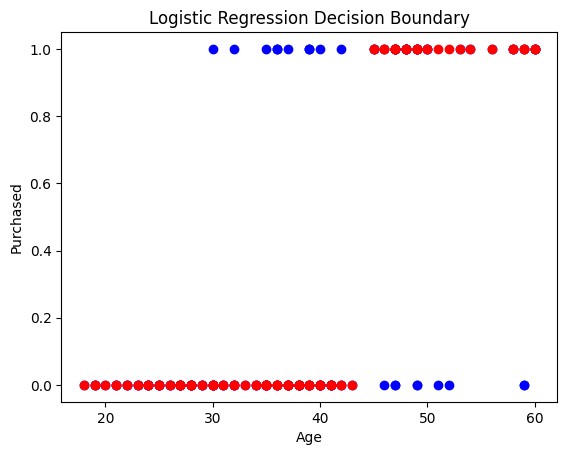

In [7]:
# Predict on the test set
y_pred_probab = probab(X_test, b)
y_pred = np.round(y_pred_probab)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)


# Plot the decision boundary
plt.scatter(X_test[:, 1], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 1], y_pred, color='red', label='Predicted')
plt.xlabel('Age')
plt.ylabel('Purchased')
plt.title('Logistic Regression Decision Boundary')
plt.show()

The above implementation can be achieved easily using the Logistic Regression class of sklearn.

We can notice that there is a slight increase in accuracy of our model using this method

Accuracy: 0.875


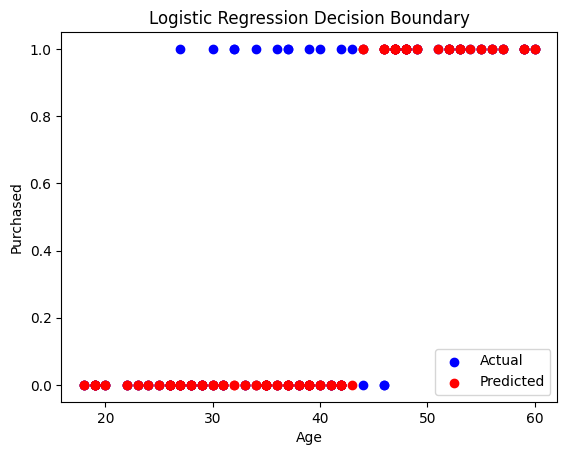

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Read the CSV file into a pandas DataFrame
df = pd.read_csv("Social_Network_Ads.csv")

# Select features (Age) and target variable (Purchased)
X = df[['Age']].values
y = df['Purchased'].values

# Split the dataset into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Logistic Regression model
model = LogisticRegression()
# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

# Plot the decision boundary
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Age')
plt.ylabel('Purchased')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()


# Logistic Regression on Normalised Data

We can use our "implementation from scratch" approach and use normalised data instead of raw data, and notice any changes in model accuracy.

The model accuracy decreases.

Accuracy: 0.7416666666666667


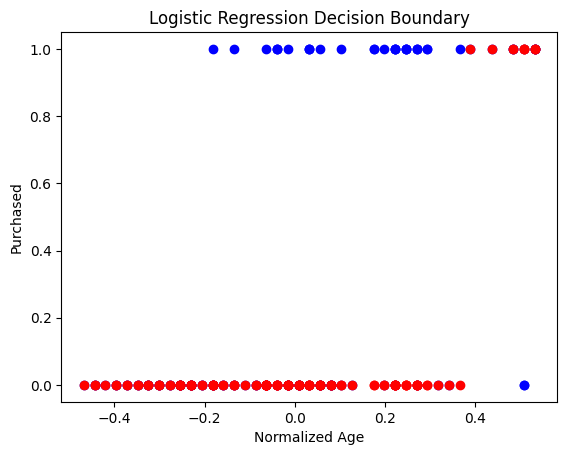

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
df = pd.read_csv("Social_Network_Ads.csv")

# Select features (Age) and target variable (Purchased)
X_raw = df['Age'].values
y = df['Purchased'].values

# Normalize the 'Age' feature
X = (X_raw - np.mean(X_raw)) / (np.max(X_raw) - np.min(X_raw))

# Add a column of ones to X for the bias term
X = np.c_[np.ones(X.shape[0]), X]

# Split the dataset into training (70%) and testing (30%)
np.random.seed(42)
indices = np.random.permutation(len(X))
split = int(0.7 * len(X))
X_train, y_train = X[indices[:split]], y[indices[:split]]
X_test, y_test = X[indices[split:]], y[indices[split:]]

# Define the probability function
def probab(X, b):
    return np.array([1 / (1 + np.exp(-z)) for z in np.dot(X, b)])

# Define the logistic update rule for coefficients
def logistic_update(X, y, b, learning_rate):
    m = len(X)
    gradient = np.dot(X.T, (probab(X, b) - y)) / m
    b -= learning_rate * gradient
    return b

# Initialize coefficients and parameters
b = np.zeros(X_train.shape[1])
learning_rate = 0.001
epochs = 20000

# Training
for i in range(epochs):
    b = logistic_update(X_train, y_train, b, learning_rate)

# Predict on the test set
y_pred_probab = probab(X_test, b)
y_pred = np.round(y_pred_probab)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

# Plot the decision boundary (optional)
plt.scatter(X_test[:, 1], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 1], y_pred, color='red', label='Predicted')
plt.xlabel('Normalized Age')
plt.ylabel('Purchased')
plt.title('Logistic Regression Decision Boundary')
plt.show()

Let's try using sklearn and apply logistic regression on normalised data.

It brings the accuracy back up.

Accuracy: 0.875


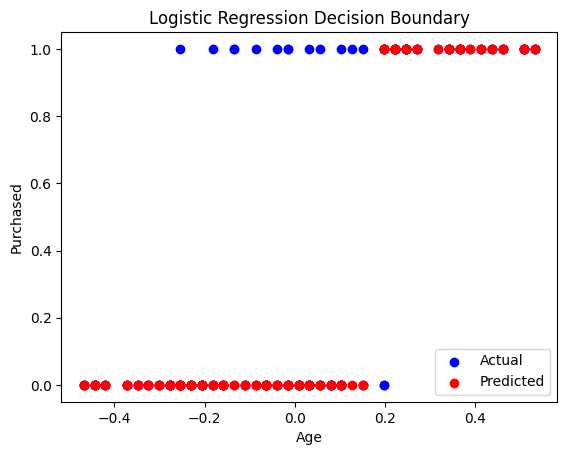

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Read the CSV file into a pandas DataFrame
df = pd.read_csv("Social_Network_Ads.csv")

# Select features (Age) and target variable (Purchased)
X_raw = df[['Age']].values
y = df['Purchased'].values

# Normalize the 'Age' feature
X = (X_raw - np.mean(X_raw)) / (np.max(X_raw) - np.min(X_raw))

# Split the dataset into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Logistic Regression model
model = LogisticRegression()
# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

# Plot the decision boundary (optional)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Age')
plt.ylabel('Purchased')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()


# Logistic Regression on Standardised Data

Using our "from scratch" approach, using standardised data this time.

The accuracy is very close to the raw data approach.

Accuracy: 0.8166666666666667


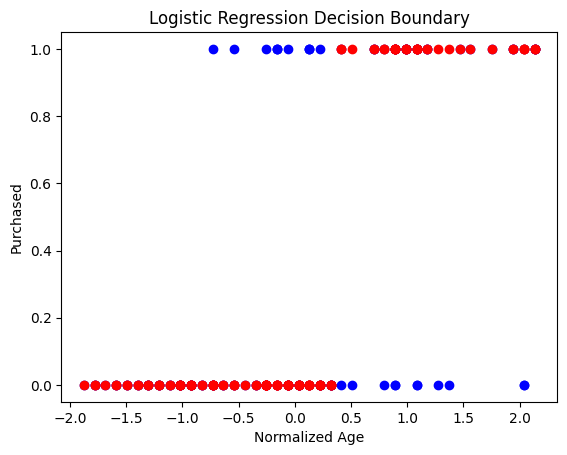

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
df = pd.read_csv("Social_Network_Ads.csv")

# Select features (Age) and target variable (Purchased)
X_raw = df['Age'].values
y = df['Purchased'].values

# Normalize the 'Age' feature
X = (X_raw - np.mean(X_raw)) /np.std(X_raw)

# Add a column of ones to X for the bias term
X = np.c_[np.ones(X.shape[0]), X]

# Split the dataset into training (70%) and testing (30%)
np.random.seed(42)
indices = np.random.permutation(len(X))
split = int(0.7 * len(X))
X_train, y_train = X[indices[:split]], y[indices[:split]]
X_test, y_test = X[indices[split:]], y[indices[split:]]

# Define the probability function
def probab(X, b):
    return np.array([1 / (1 + np.exp(-z)) for z in np.dot(X, b)])

# Define the logistic update rule for coefficients
def logistic_update(X, y, b, learning_rate):
    m = len(X)
    gradient = np.dot(X.T, (probab(X, b) - y)) / m
    b -= learning_rate * gradient
    return b

# Initialize coefficients and parameters
b = np.zeros(X_train.shape[1])
learning_rate = 0.001
epochs = 20000

# Training
for i in range(epochs):
    b = logistic_update(X_train, y_train, b, learning_rate)

# Predict on the test set
y_pred_probab = probab(X_test, b)
y_pred = np.round(y_pred_probab)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

# Plot the decision boundary (optional)
plt.scatter(X_test[:, 1], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 1], y_pred, color='red', label='Predicted')
plt.xlabel('Normalized Age')
plt.ylabel('Purchased')
plt.title('Logistic Regression Decision Boundary')
plt.show()

Using sklearn and Standard Scalar class for standardisation.

Gives us the same 87.5% accuracy.

Accuracy: 0.875


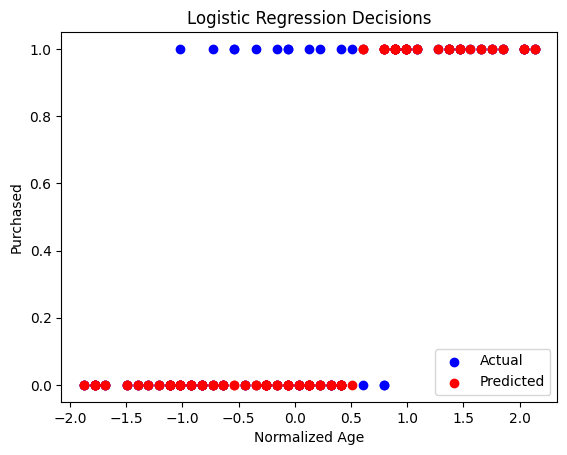

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Read the CSV file into a pandas DataFrame
df = pd.read_csv("Social_Network_Ads.csv")

# Select features (Age) and target variable (Purchased)
X_raw = df[['Age']].values
y = df['Purchased'].values

# Normalize the 'Age' feature
scaler = StandardScaler()
X = scaler.fit_transform(X_raw)

# Split the dataset into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

# Plot the decision boundary (optional)
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 0], y_pred, color='red', label='Predicted')
plt.xlabel('Normalized Age')
plt.ylabel('Purchased')
plt.title('Logistic Regression Decisions')
plt.legend()
plt.show()

# Q2. Implementation of K-Nearest Neighbours

First, let's read the data from the CSV file and plot it.

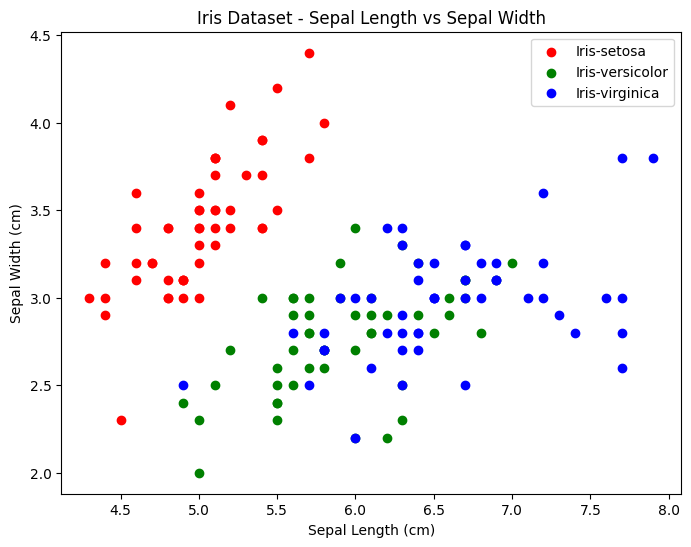

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#For plotting data frame
def plot_data(data):
    plt.figure(figsize=(8, 6))

    # Define colors for each species
    species_colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}

    # Plot each species separately
    for species, color in species_colors.items():
        species_data = data[data['Species'] == species]
        plt.scatter(species_data['SepalLengthCm'], species_data['SepalWidthCm'], c=color, label=species)

    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Sepal Width (cm)')
    plt.title('Iris Dataset - Sepal Length vs Sepal Width')
    plt.legend()
    plt.show()

#Reading and Plotting Data
data_iris = pd.read_csv("Iris.csv")
plot_data(data_iris)

Let's apply K-NN Classification Algorithm, implementing it from scratch.

In [15]:
#distance function
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

#Splitting function
def split_train_test_data(data, split_ratio=0.7):
    shuffled_data = data.sample(frac=1, random_state=42).reset_index(drop=True)
    split_index = int(split_ratio * len(shuffled_data))

    train_data = shuffled_data.iloc[:split_index, :]
    test_data = shuffled_data.iloc[split_index:, :]

    return train_data, test_data

#K-NN Implementation Function
def k_nearest_neighbors(train_data, test_instance, k):

    distances = []
    for index, row in train_data.iterrows():
        features = row[:-1].values
        label = row[-1]
        distance = euclidean_distance(np.array(features), np.array(test_instance))
        distances.append((distance, label))

    # Sort distances and get k-nearest neighbors
    sorted_distances = sorted(distances, key=lambda x: x[0])
    neighbors = sorted_distances[:k]

    # Count the occurrences of each class among the k-nearest neighbors
    class_votes = {}
    for neighbor in neighbors:
        label = neighbor[1]
        class_votes[label] = class_votes.get(label, 0) + 1

    # Return the class with the most votes
    predicted_class = max(class_votes, key=class_votes.get)
    return predicted_class

#Accuracy of the model
def k_nn_accuracy(train_data, test_data, k):

    correct_predictions = 0
    for _, test_instance in test_data.iterrows():
        features = test_instance[:-1].values
        true_label = test_instance[-1]
        predicted_label = k_nearest_neighbors(train_data, features, k)

        if predicted_label == true_label:
            correct_predictions += 1

    accuracy = correct_predictions / len(test_data)
    return accuracy



Time for a test run of the above implementation

In [19]:
data_iris = pd.read_csv("Iris.csv")
data_train, data_test = split_train_test_data(data_iris)
print(k_nn_accuracy(data_train, data_test, 2))

1.0


Let's plot accuracy vs Number of Neighbours (k)


In [27]:
accuracies = []
max_k = 75


# Iterate over different values of k
for k_value in range(1, max_k + 1):
    # Calculate accuracy for the current k
    accuracy = k_nn_accuracy(data_train, data_test, k_value)
    accuracies.append(accuracy)

Here's the plot:

We experience high accuracies for small values of K, but it typically decreases when we increase K beyond a particular value

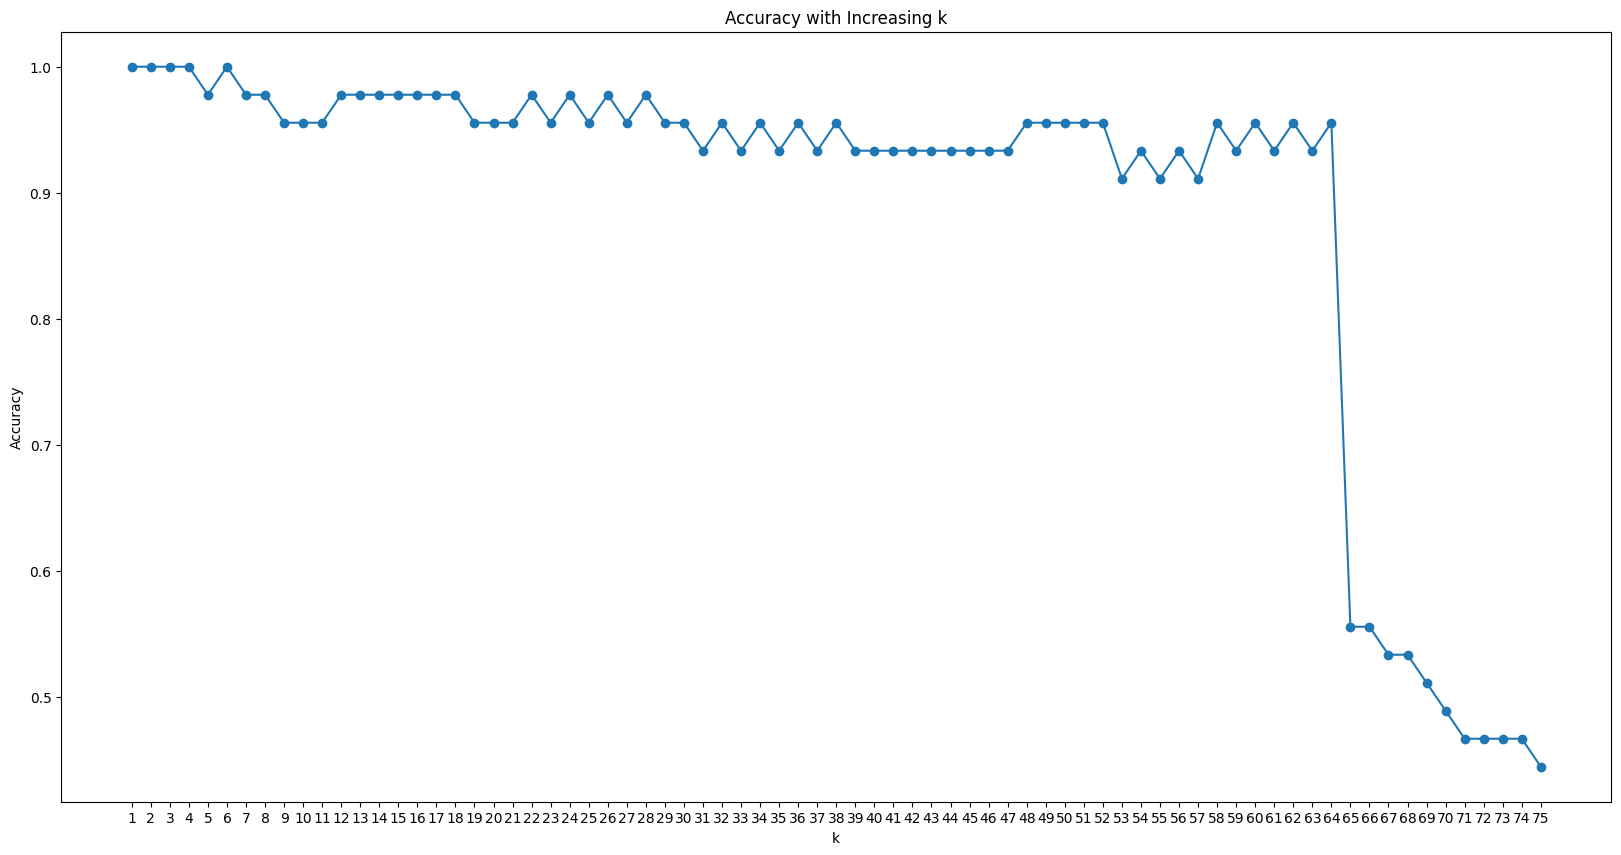

In [28]:
# Plot the accuracy with increasing k
plt.figure(figsize = (20, 10))
plt.plot(range(1, max_k + 1), accuracies, marker='o')
plt.title('Accuracy with Increasing k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(range(1, max_k + 1))
plt.show()



---

End of Assignment 2